In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import GridSearchCV

df_model = pd.read_csv("london_model_with_poi.csv")

# 1. 设置特征与目标
X = df_model.drop(columns=["Theft_Rate_per1k", "LSOA_Code"])
y = df_model["Theft_Rate_per1k"]

# 2. 拆分数据（80% 训练, 20% 测试）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 2. 网格搜索调参（替换原来的 model = XGBRegressor()）
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
}

xgb = XGBRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,  # 3折交叉验证
    scoring='r2',
    verbose=1,  # 显示搜索过程
    n_jobs=-1   # 并行加速（用你所有 CPU 核心）
)

grid_search.fit(X_train, y_train)

# 用找到的最佳模型继续后面的预测
model = grid_search.best_estimator_

# 4. 预测 + 评估
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost RMSE: {rmse:.2f}")
print(f"XGBoost R-squared: {r2:.3f}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
XGBoost RMSE: 44.14
XGBoost R-squared: 0.703


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [11]:
import shap

# 如果你用了 XGBoost 的 scikit-learn API（XGBRegressor）：
explainer = shap.Explainer(model, X_train)

# 计算 SHAP 值
shap_values = explainer(X_train)


100%|===================| 17364/17448 [01:37<00:00]        

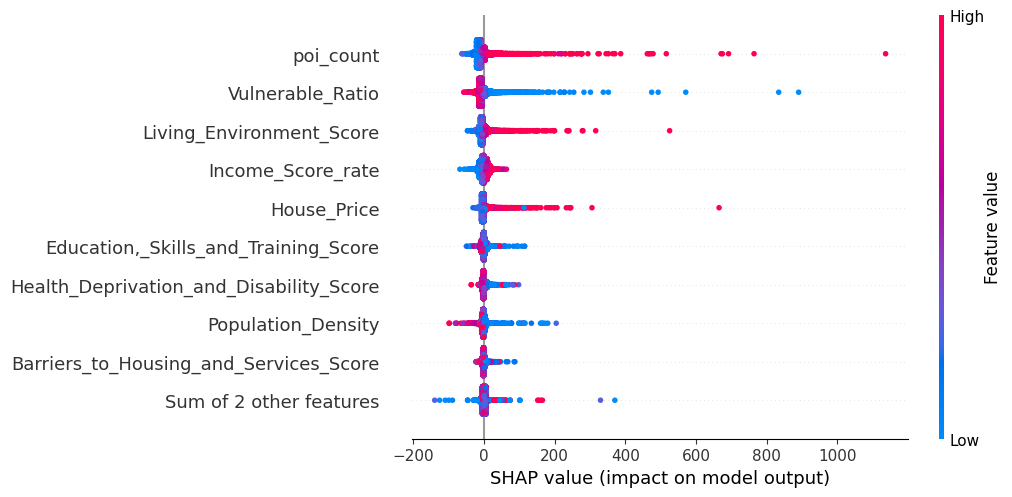

In [12]:
shap.plots.beeswarm(shap_values, max_display=10)


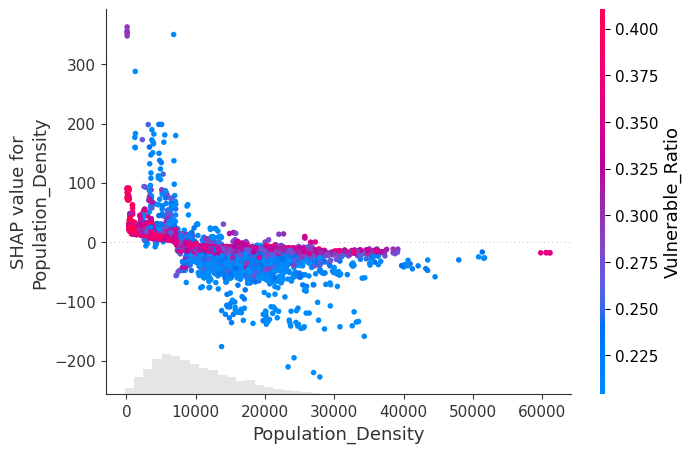

In [9]:
shap.plots.scatter(shap_values[:, "Population_Density"], color=shap_values)